# Credit Card Approval Predictions Model

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# data splitting
from sklearn.model_selection import train_test_split

#feature selection
from sklearn.feature_selection import SelectFromModel

# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# decision trees

from sklearn.tree import DecisionTreeClassifier

# SVM classifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance

# Perceptron
from sklearn.linear_model import Perceptron

In [5]:
# Reads the CSV file into a DataFrame
application_file = pd.read_csv('application_record.csv')

# Displays the first 90 rows of the DataFrame
application_file.head(90)

# Renaming columns for better readability
application_file.columns = ['Gender', 'Age', 'Income', 'Marital_Status', 'number_of_children', 'Education_status', 'Employed', 'Years_of_employement', 'customer_status', 'Income_Category', 'Credit_Score', 'Drivers_License', 'Ethinicity', 'zipcode', 'Loan', 'Approval_Status']

# Displays the length of the data
print('Length of the data:', len(application_file))

# Displays the first 50 rows of the DataFrame
application_file.head(50)


Length of the data: 689


,Gender,Age,Income,Marital_Status,number_of_children,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Ethinicity,zipcode,Loan,Approval_Status
0,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
5,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
6,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
7,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
8,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
9,b,22.08,0.830,u,g,c,h,2.165,f,f,0,t,g,00128,0,+


In [6]:
# Displays information about the DataFrame
application_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                689 non-null    object 
 1   Age                   689 non-null    object 
 2   Income                689 non-null    float64
 3   Marital_Status        689 non-null    object 
 4   number_of_children    689 non-null    object 
 5   Education_status      689 non-null    object 
 6   Employed              689 non-null    object 
 7   Years_of_employement  689 non-null    float64
 8   customer_status       689 non-null    object 
 9   Income_Category       689 non-null    object 
 10  Credit_Score          689 non-null    int64  
 11  Drivers_License       689 non-null    object 
 12  Ethinicity            689 non-null    object 
 13  zipcode               689 non-null    object 
 14  Loan                  689 non-null    int64  
 15  Approval_Status       6

In [7]:
# Replacing the 'Age' column to numerical values, replacing '?' with NaN, then filling NaN with the mean value

def replace(value):
    try:
        return float(value)
    
    except ValueError:
        return np.nan

application_file['Age'] = application_file['Age'].apply(replace)
application_file['Age'].fillna(application_file['Age'].mean(), inplace=True)

In [8]:
application_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                689 non-null    object 
 1   Age                   689 non-null    float64
 2   Income                689 non-null    float64
 3   Marital_Status        689 non-null    object 
 4   number_of_children    689 non-null    object 
 5   Education_status      689 non-null    object 
 6   Employed              689 non-null    object 
 7   Years_of_employement  689 non-null    float64
 8   customer_status       689 non-null    object 
 9   Income_Category       689 non-null    object 
 10  Credit_Score          689 non-null    int64  
 11  Drivers_License       689 non-null    object 
 12  Ethinicity            689 non-null    object 
 13  zipcode               689 non-null    object 
 14  Loan                  689 non-null    int64  
 15  Approval_Status       6

In [9]:
# Checking for missing values in the DataFrame
application_file.isnull().sum()

Gender                  0
Age                     0
Income                  0
Marital_Status          0
number_of_children      0
Education_status        0
Employed                0
Years_of_employement    0
customer_status         0
Income_Category         0
Credit_Score            0
Drivers_License         0
Ethinicity              0
zipcode                 0
Loan                    0
Approval_Status         0
dtype: int64

# Data Manipulation

In [10]:
# Replacing '+' with 1 and '-' with 0 in the 'Approval_Status' column
application_file['Approval_Status'] = application_file['Approval_Status'].replace({'+': 1, '-': 0})
application_file.head(90)

,Gender,Age,Income,Marital_Status,number_of_children,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Ethinicity,zipcode,Loan,Approval_Status
0,a,58.670000,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,1
1,a,24.500000,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,1
2,b,27.830000,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,1
3,b,20.170000,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,1
4,b,32.080000,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,b,31.569261,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,0
86,b,25.670000,2.210,y,p,aa,v,4.000,t,f,0,f,g,00188,0,0
87,b,34.000000,4.500,u,g,aa,v,1.000,t,f,0,t,g,00240,0,0
88,a,49.000000,1.500,u,g,j,j,0.000,t,f,0,t,g,00100,27,0


0    383
1    306
Name: Approval_Status, dtype: int64


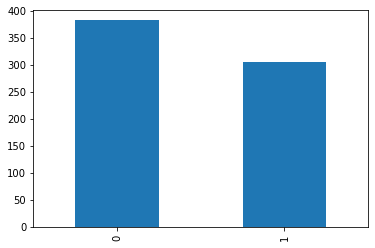

In [11]:
# Plotting the value counts of 'Approval_Status'

application_file['Approval_Status'].value_counts().plot(kind='bar')
print(application_file['Approval_Status'].value_counts())

In [12]:
#There are certain columns which have alphabets instead of numericals. we need to replace them.

# First let's convert the gender column since it's not given in terms of male or female
application_file['Gender'] = application_file['Gender'].replace({'a': 'f', 'b': 'm'})

# now let's convert them to binary interms 0 and 1
application_file['Gender'] = application_file['Gender'].replace({'f': 1, 'm': 0})

# now let's convert the other columns to numerical values as well

application_file = application_file.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

application_file.head(90)

,Gender,Age,Income,Marital_Status,number_of_children,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Ethinicity,zipcode,Loan,Approval_Status
0,0,58.670000,4.460,0,0,0,0,3.040,0,0,6,0,0,0,560,1
1,0,24.500000,0.500,0,0,0,0,1.500,0,1,0,0,0,1,824,1
2,1,27.830000,1.540,0,0,1,1,3.750,0,0,5,1,0,2,3,1
3,1,20.170000,5.625,0,0,1,1,1.710,0,1,0,0,1,3,0,1
4,1,32.080000,4.000,0,0,2,1,2.500,0,1,0,1,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,31.569261,0.375,0,0,7,1,0.875,0,1,0,1,1,44,0,0
86,1,25.670000,2.210,1,1,11,1,4.000,0,1,0,0,0,45,0,0
87,1,34.000000,4.500,0,0,11,1,1.000,0,1,0,1,0,23,0,0
88,0,49.000000,1.500,0,0,13,4,0.000,0,1,0,1,0,2,27,0


# Data Cleaning

<AxesSubplot:>

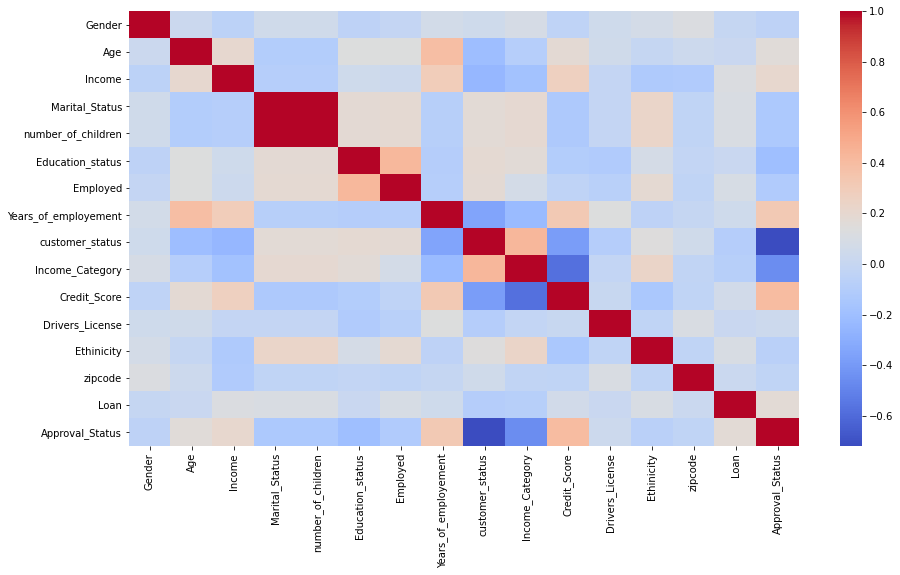

In [13]:
# Building correlation plot to see correlation between each feature in order to remove some features from data

corr_matrix = application_file.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, annot = False, cmap = 'coolwarm')

In [14]:
# Dropping unnecessary columns

application_file = application_file.drop(['zipcode','Ethinicity','Marital_Status','number_of_children'], axis = 1)

application_file.head(50)


,Gender,Age,Income,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Loan,Approval_Status
0,0,58.67,4.460,0,0,3.040,0,0,6,0,560,1
1,0,24.50,0.500,0,0,1.500,0,1,0,0,824,1
2,1,27.83,1.540,1,1,3.750,0,0,5,1,3,1
3,1,20.17,5.625,1,1,1.710,0,1,0,0,0,1
4,1,32.08,4.000,2,1,2.500,0,1,0,1,0,1
5,1,33.17,1.040,3,0,6.500,0,1,0,1,31285,1
6,0,22.92,11.585,4,1,0.040,0,1,0,0,1349,1
7,1,54.42,0.500,5,0,3.960,0,1,0,0,314,1
8,1,42.50,4.915,1,1,3.165,0,1,0,1,1442,1
9,1,22.08,0.830,6,0,2.165,1,1,0,1,0,1


In [15]:
# splitting data into training and test data since we have everything in a single csv file.

attributes = application_file.drop(['Approval_Status'], axis = 1)

decider_column = application_file['Approval_Status']

train_data, test_data, train_decider_column, test_decider_column = train_test_split(attributes, decider_column, test_size=0.35)

training_set_length = len(train_data)
testing_set_length = len(test_data)
train_decider_column_length = len(train_decider_column)
test_decider_column_length = len(test_decider_column)

# Print the length
print("Training attributes length:", training_set_length)
print("Testing attributes length:", testing_set_length)
print("Training decider_column length:", train_decider_column_length)
print("Testing decider_column length:", test_decider_column_length)


Training attributes length: 447
Testing attributes length: 242
Training decider_column length: 447
Testing decider_column length: 242


In [16]:
train_data

,Gender,Age,Income,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Loan
358,0,36.750000,4.710,12,3,0.000,1,1,0,0,0
650,0,15.830000,7.625,0,1,0.125,1,0,1,1,160
435,1,19.580000,0.585,12,3,0.000,1,0,3,0,769
328,1,31.569261,4.000,9,1,0.085,1,1,0,1,0
544,1,44.250000,11.000,7,1,1.500,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
357,1,32.420000,3.000,7,1,0.165,1,1,0,1,0
665,0,21.750000,11.750,6,1,0.250,1,1,0,1,0
179,1,47.670000,0.290,6,2,15.000,0,0,20,0,15000
151,1,37.330000,6.500,2,0,4.250,0,0,12,1,0


In [17]:
test_data

,Gender,Age,Income,Education_status,Employed,Years_of_employement,customer_status,Income_Category,Credit_Score,Drivers_License,Loan
485,1,28.17,0.125,5,1,0.085,1,1,0,0,2100
284,1,17.58,10.000,1,0,0.165,1,0,1,0,1
143,1,27.25,1.665,4,0,5.085,0,0,9,0,827
120,1,25.67,12.500,4,1,1.210,0,0,67,1,258
247,2,24.50,12.750,6,2,4.750,0,0,2,0,444
...,...,...,...,...,...,...,...,...,...,...,...
551,1,34.75,15.000,3,9,5.375,0,0,9,1,134
538,1,80.25,5.500,14,6,0.540,0,1,0,0,340
534,0,33.92,1.585,12,3,0.000,0,1,0,0,0
500,1,39.00,5.000,4,1,3.500,0,0,10,1,0


# Logistic Regression

In [201]:
# Function to evaluate logistic regression

def evaluate_logistic_regression(train_data, train_decider_column, test_data, 
                                 test_decider_column):
    # Logistic Regression Model
    model = LogisticRegression(solver='lbfgs', max_iter=1000)

    # Train the model on the training set
    model.fit(train_data, train_decider_column)

    # Make predictions on the test set
    prediction = model.predict(test_data)

    # Calculate accuracy
    logistic_regression_accuracy = accuracy_score(test_decider_column, prediction)

    print(f"Accuracy for testing set: {logistic_regression_accuracy* 100:.2f}%")
    print("\nClassification Report:\n", classification_report(test_decider_column, 
                                                              prediction))
    print("Confusion Matrix:\n", confusion_matrix(test_decider_column, prediction))
    
    # Extracting feature importances (coefficients)
    feature_importance = np.abs(model.coef_[0])
    feature_names = test_data.columns

    # Creating a bar plot to visualize feature importances
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importance)
    plt.title('Feature Importance in Logistic Regression Model')
    plt.xlabel('Feature Names')
    plt.ylabel('Absolute Coefficient Values')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    return logistic_regression_accuracy

Accuracy for testing set: 88.02%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       128
           1       0.85      0.91      0.88       114

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242

Confusion Matrix:
 [[109  19]
 [ 10 104]]


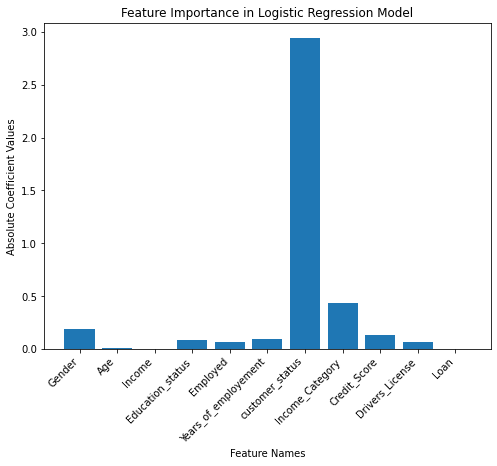

0.8801652892561983

In [202]:
# Evaluate logistic regression
evaluate_logistic_regression(train_data, train_decider_column, test_data, 
                             test_decider_column)

# Decision Trees

In [2]:
# Function to evaluate decision tree

def evaluate_decision_tree(train_data, train_decider_column, test_data, 
                           test_decider_column, max_depth):
    
    # Initializing and training the Decision Tree model
    decision_trees = DecisionTreeClassifier(max_depth=max_depth)
    decision_trees.fit(train_data, train_decider_column)

    # Predictions and evaluation on the training set
    data_train_prediction = decision_trees.predict(train_data)
    decision_tree_train_accuracy = accuracy_score(data_train_prediction, 
                                                  train_decider_column)
    print(f"Accuracy for the Training set: {decision_tree_train_accuracy * 100:.2f}%")
    print("\nClassification Report:\n", classification_report(train_decider_column, 
                                                              data_train_prediction))
    print("Confusion Matrix:\n", confusion_matrix(train_decider_column, 
                                                  data_train_prediction))

    # Predictions and evaluation on the testing set
    data_test_prediction = decision_trees.predict(test_data)
    decision_tree_test_accuracy = accuracy_score(data_test_prediction, 
                                                 test_decider_column)
    print(f"Accuracy for the Testing set: {decision_tree_test_accuracy * 100:.2f}%")
    print("\nClassification Report:\n", classification_report(test_decider_column, 
                                                              data_test_prediction))
    print("Confusion Matrix:\n", confusion_matrix(test_decider_column, 
                                                  data_test_prediction))
    
    # Feature Importance
    feature_importance = decision_trees.feature_importances_
    feature_names = test_data.columns

    # Creating a bar plot to visualize feature importances
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importance)
    plt.title('Feature Importance in Decision Tree Model')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance Score')
    plt.xticks(rotation=45, ha='right')
    plt.show()
  
    
    return decision_tree_test_accuracy


Accuracy for the Training set: 88.37%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       255
           1       0.92      0.80      0.85       192

    accuracy                           0.88       447
   macro avg       0.89      0.87      0.88       447
weighted avg       0.89      0.88      0.88       447

Confusion Matrix:
 [[242  13]
 [ 39 153]]
Accuracy for the Testing set: 83.88%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       128
           1       0.89      0.75      0.82       114

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.84       242
weighted avg       0.84      0.84      0.84       242

Confusion Matrix:
 [[117  11]
 [ 28  86]]


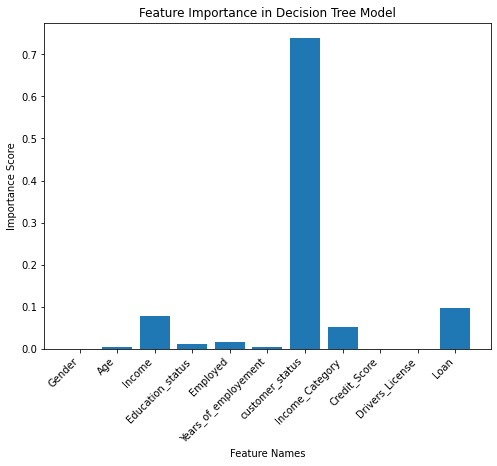

0.8388429752066116

In [251]:
# with depth 4
evaluate_decision_tree(train_data, train_decider_column, test_data, 
                       test_decider_column, max_depth=4)


Accuracy for the Training set: 100.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       197

    accuracy                           1.00       447
   macro avg       1.00      1.00      1.00       447
weighted avg       1.00      1.00      1.00       447

Confusion Matrix:
 [[250   0]
 [  0 197]]
Accuracy for the Testing set: 81.40%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       133
           1       0.79      0.80      0.79       109

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242

Confusion Matrix:
 [[110  23]
 [ 22  87]]


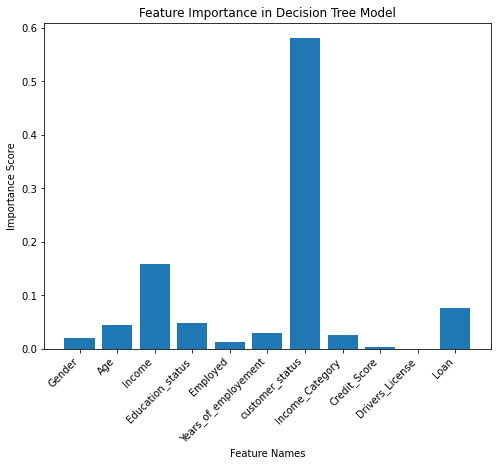

0.8140495867768595

In [68]:
# with depth 10
evaluate_decision_tree(train_data, train_decider_column, test_data, 
                       test_decider_column, max_depth=10)

Accuracy for the Training set: 91.72%

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       255
           1       0.89      0.92      0.90       192

    accuracy                           0.92       447
   macro avg       0.91      0.92      0.92       447
weighted avg       0.92      0.92      0.92       447

Confusion Matrix:
 [[234  21]
 [ 16 176]]
Accuracy for the Testing set: 86.78%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       128
           1       0.84      0.89      0.86       114

    accuracy                           0.87       242
   macro avg       0.87      0.87      0.87       242
weighted avg       0.87      0.87      0.87       242

Confusion Matrix:
 [[109  19]
 [ 13 101]]


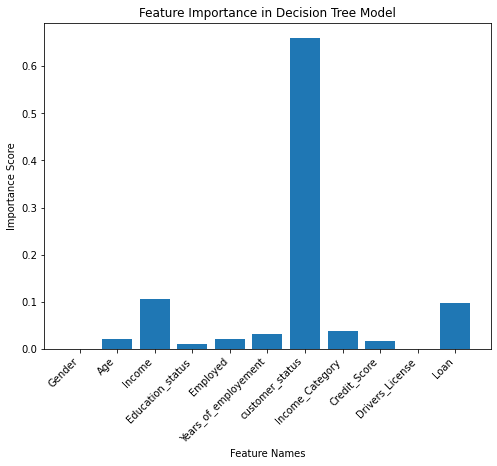

0.8677685950413223

In [266]:
# with depth 5 
evaluate_decision_tree(train_data, train_decider_column, test_data, 
                       test_decider_column, max_depth=5)

# SVM Classifier

In [216]:
# Function to evaluate SVM

def evaluate_svm(train_data, test_data, train_decider_column, test_decider_column, 
                 n_components, C, kernel):
    
    
    # Initializing and fitting SVM model
    
    my_model = SVC(C=C, kernel=kernel)
    my_model.fit(train_data, train_decider_column)

    # Predictions and evaluation
    
    prediction_decider_column = my_model.predict(test_data)
    svm_accuracy = accuracy_score(test_decider_column, prediction_decider_column)
    
    print(f"Accuracy for the Testing set: {svm_accuracy * 100:.2f}%")
    print(f"Classification Report (C={C}, kernel='{kernel}'):")
    print(classification_report(test_decider_column, prediction_decider_column))
    print("Confusion Matrix:")
    print(confusion_matrix(test_decider_column, prediction_decider_column))
    print("\n")
    
    if kernel == 'linear':
        feature_importance = np.abs(my_model.coef_.flatten())
        feature_names = train_data.columns

        # Creating a bar plot to visualize feature importances
        plt.figure(figsize=(12, 6))
        plt.bar(feature_names, feature_importance)
        plt.title('Feature Importance in Linear SVM Model')
        plt.xlabel('Feature Names')
        plt.ylabel('Coefficient Magnitude')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif kernel == 'rbf':
        result = permutation_importance(my_model, test_data, test_decider_column, 
                                        n_repeats=10, random_state=42)
        feature_importance = result.importances_mean
        feature_names = test_data.columns

        # Creating a bar plot to visualize feature importances
        plt.figure(figsize=(8, 6))
        plt.bar(feature_names, feature_importance)
        plt.title('Permutation Importance in rbf SVM Model')
        plt.xlabel('Feature Names')
        plt.ylabel('Permutation Importance')
        plt.xticks(rotation=45, ha='right')
        plt.show()

    return svm_accuracy

Accuracy for the Testing set: 87.19%
Classification Report (C=0.1, kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       128
           1       0.82      0.93      0.87       114

    accuracy                           0.87       242
   macro avg       0.88      0.88      0.87       242
weighted avg       0.88      0.87      0.87       242

Confusion Matrix:
[[105  23]
 [  8 106]]




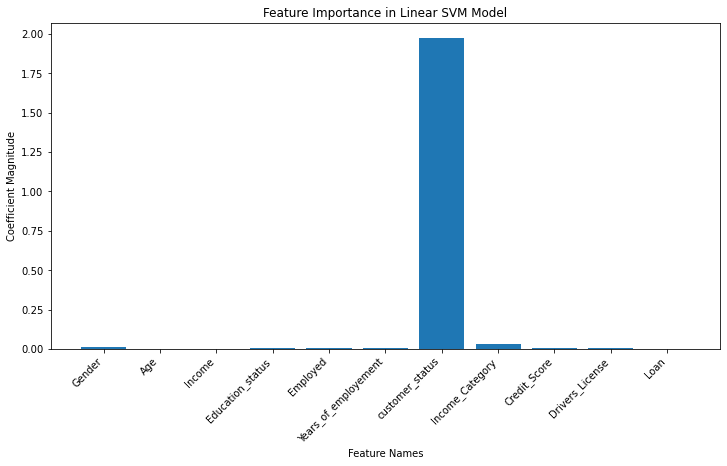

0.871900826446281

In [217]:
# Evaluating SVM with different parameters

evaluate_svm(train_data, test_data, train_decider_column, test_decider_column,
             n_components=4, C=0.1, kernel='linear')

Accuracy for the Testing set: 57.85%
Classification Report (C=0.1, kernel='rbf'):
              precision    recall  f1-score   support

           0       0.56      0.98      0.71       128
           1       0.88      0.12      0.22       114

    accuracy                           0.58       242
   macro avg       0.72      0.55      0.46       242
weighted avg       0.71      0.58      0.48       242

Confusion Matrix:
[[126   2]
 [100  14]]




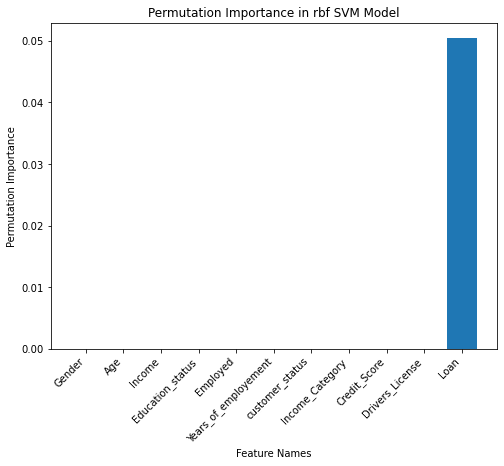

0.5785123966942148

In [218]:
evaluate_svm(train_data, test_data, train_decider_column, test_decider_column,
             n_components=4, C=0.1, kernel='rbf')

# Perceptron

In [111]:
# Function to train and evaluate perceptron

def evaluate_perceptron(train_vectors, train_labels, test_vectors, test_labels):
    
    # Initialising a Perceptron
    
    percep = Perceptron()

    # Fit the model to the training data
    
    percep.fit(train_data, train_decider_column)

    # Make predictions on the test data
    
    prediction_percep = percep.predict(test_data)
    
    perceptron_accuracy = accuracy_score(test_decider_column, prediction_percep)
    
    # Print the accuracy score
    
    print(f"Accuracy for the Testing set: {perceptron_accuracy * 100:.2f}%")


    # Print the classification report
    
    print("Classification report:")
    print(classification_report(test_decider_column, prediction_percep))
    
    # Print the confusion matrix
    
    print('Confusion matrix:')
    print(confusion_matrix(test_decider_column, prediction_percep))
    
    # Feature Importance
    feature_importance = np.abs(percep.coef_.flatten())
    feature_names = test_data.columns

    # Create a bar plot to visualize feature importances
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importance)
    plt.title('Feature Importance in Perceptron Model')
    plt.xlabel('Feature Names')
    plt.ylabel('Coefficient Magnitude')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    

    # Return the perceptron accuracy
    
    return perceptron_accuracy



Accuracy for the Testing set: 61.16%
Classification report:
              precision    recall  f1-score   support

           0       0.68      0.56      0.61       133
           1       0.56      0.68      0.61       109

    accuracy                           0.61       242
   macro avg       0.62      0.62      0.61       242
weighted avg       0.62      0.61      0.61       242

Confusion matrix:
[[74 59]
 [35 74]]


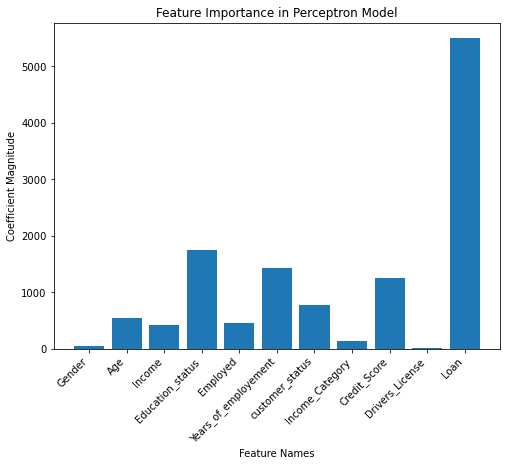

0.6115702479338843

In [113]:
# Evaluate the perceptron model
evaluate_perceptron(train_data, train_decider_column, test_data, test_decider_column)


In [95]:
# List to store accuracy values for each model
accuracies = []

# Function to plot accuracy
def plot_accuracy(model_name, accuracy):
    accuracies.append((model_name, accuracy))
    
    #plotting
    
    plt.bar(*zip(*accuracies))
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracies')
    plt.show()

Accuracy for testing set: 88.02%

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       128
           1       0.85      0.91      0.88       114

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242

Confusion Matrix:
 [[109  19]
 [ 10 104]]


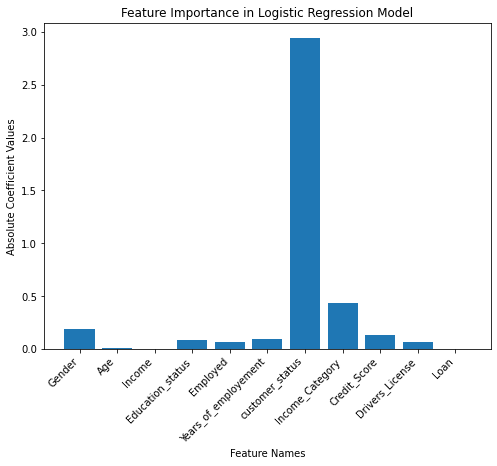

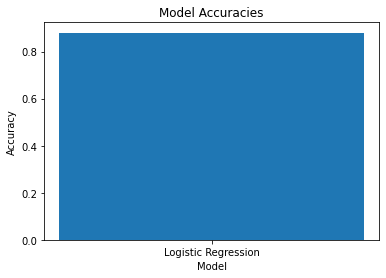

Accuracy for the Training set: 94.63%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       255
           1       0.94      0.93      0.94       192

    accuracy                           0.95       447
   macro avg       0.95      0.94      0.95       447
weighted avg       0.95      0.95      0.95       447

Confusion Matrix:
 [[244  11]
 [ 13 179]]
Accuracy for the Testing set: 83.88%

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       128
           1       0.83      0.82      0.83       114

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242

Confusion Matrix:
 [[109  19]
 [ 20  94]]


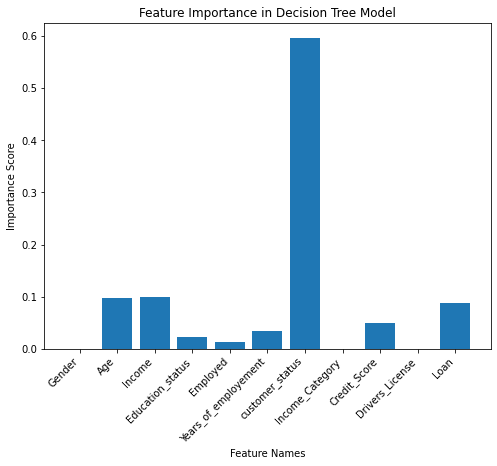

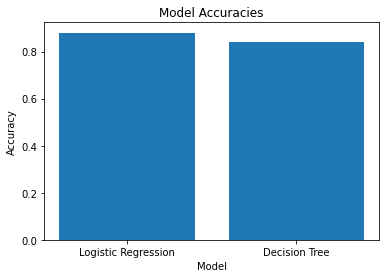

Accuracy for the Testing set: 87.19%
Classification Report (C=0.1, kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       128
           1       0.82      0.93      0.87       114

    accuracy                           0.87       242
   macro avg       0.88      0.88      0.87       242
weighted avg       0.88      0.87      0.87       242

Confusion Matrix:
[[105  23]
 [  8 106]]




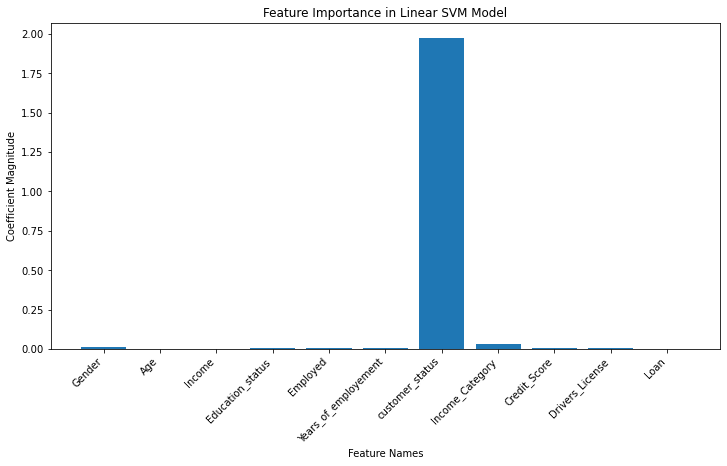

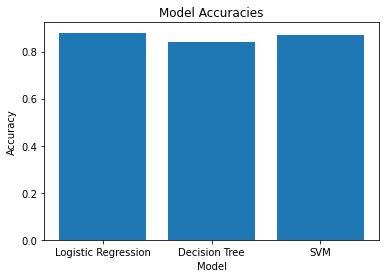

Accuracy for the Testing set: 60.74%
Classification report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       128
           1       0.58      0.58      0.58       114

    accuracy                           0.61       242
   macro avg       0.61      0.61      0.61       242
weighted avg       0.61      0.61      0.61       242

Confusion matrix:
[[81 47]
 [48 66]]


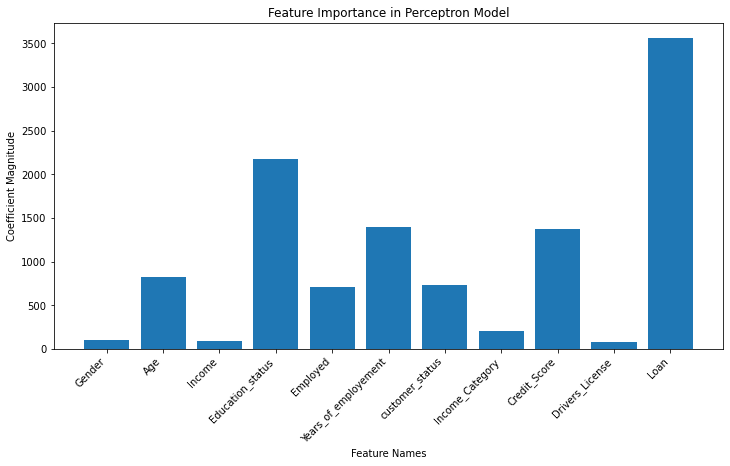

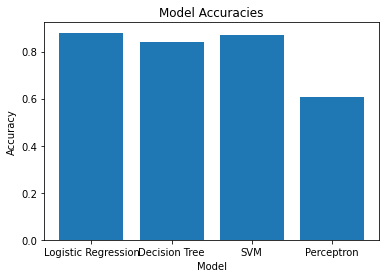

In [256]:
# Evaluate Logistic Regression
logistic_regression_accuracy = evaluate_logistic_regression(train_data, train_decider_column, test_data, test_decider_column)
plot_accuracy('Logistic Regression', logistic_regression_accuracy)

# Evaluate Decision Tree
decision_tree_accuracy = evaluate_decision_tree(train_data, train_decider_column, test_data, test_decider_column, max_depth=6)
plot_accuracy('Decision Tree', decision_tree_accuracy)

# Evaluate PCA and SVM
svm_accuracy = evaluate_svm(train_data, test_data, train_decider_column, test_decider_column, n_components=4, C=0.1, kernel='linear')
plot_accuracy('SVM', svm_accuracy)

# Evaluate Perceptron
perceptron_accuracy = evaluate_perceptron(train_data, train_decider_column, test_data, test_decider_column)
plot_accuracy('Perceptron', perceptron_accuracy)

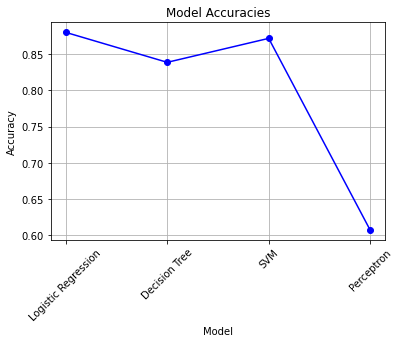

In [257]:
# Example data for the line graph
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'Perceptron']
accuracy_values = [logistic_regression_accuracy, decision_tree_accuracy, svm_accuracy, perceptron_accuracy]

# Plotting the line graph
plt.plot(model_names, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# References:

# Dataset:
https://archive.ics.uci.edu/ml/datasets/credit+approval

# Linear Regression:

https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# Decision Tree Classification:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


# Support Vector Machine (SVM) Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


# Perceptron:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
